Imports

In [1]:
import numpy as np
from sklearn.decomposition import PCA  # Only for performing the primary Component Analysis
import matplotlib.pyplot as plt # For visualizations

import pydotplus
from graphviz import Source
from IPython.display import Image, display

from sklearn.tree import DecisionTreeClassifier #For reference decision_tree
from sklearn.metrics import classification_report

from sklearn.tree import export_graphviz
import graphviz

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Loading/Preparing data set

In [2]:
train_data = np.load('fashion_train.npy')
test_data = np.load('fashion_test.npy')

In [3]:
train_data.shape

(10000, 785)

In [4]:
test_data.shape

(5000, 785)

In [5]:
print(test_data)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 3]
 ...
 [0 0 0 ... 0 0 4]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 2]]


In [6]:
# Seperating the labels
train_labels = train_data[:, -1]
test_labels = test_data[:, -1]

In [7]:
# Dropping labels from data
train_data = train_data[:, :-1]
test_data = test_data[:, :-1]

In [8]:
# Check for NaN values in the dataset
print(f"NaN values in train_data: {np.isnan(train_data).sum()}")
print(f"NaN values in test_data: {np.isnan(test_data).sum()}")

NaN values in train_data: 0
NaN values in test_data: 0


In [9]:
epsilon = 1e-8  # Small constant to avoid division by zero

# Normalizing the data
train_data = (train_data - np.mean(train_data, axis=0)) / (np.std(train_data, axis=0) + epsilon)
test_data = (test_data - np.mean(test_data, axis=0)) / (np.std(test_data, axis=0) + epsilon)

In [10]:
print(test_data)

[[ 0.         -0.04142737 -0.03739899 ... -0.15091521 -0.06852437
  -0.02866199]
 [ 0.         -0.04142737 -0.03739899 ... -0.15091521 -0.06852437
  -0.02866199]
 [ 0.         -0.04142737 -0.03739899 ... -0.15091521 -0.06852437
  -0.02866199]
 ...
 [ 0.         -0.04142737 -0.03739899 ...  0.33911469 -0.06852437
  -0.02866199]
 [ 0.         -0.04142737 -0.03739899 ... -0.15091521 -0.06852437
  -0.02866199]
 [ 0.         -0.04142737 -0.03739899 ...  2.22923003 -0.06852437
  -0.02866199]]


Exploratory Data Analysis

Principle Component Analysis

Principal Component Analysis (PCA) is used in to reduce the dimensionality of large datasets while preserving as much variability as possible. Here's a breakdown of how it works:

1. Standardize the Data: First, we standardize the data to have a mean of zero and a standard deviation of one. This ensures that each feature contributes equally to the analysis.

2. Compute the Covariance Matrix: Next, we calculate the covariance matrix of the standardized data. This matrix shows the relationships between different features in the dataset.

3. Find Eigenvalues and Eigenvectors: We then find the eigenvalues and eigenvectors of the covariance matrix. The eigenvectors represent the directions of maximum variance, while the eigenvalues indicate the magnitude of this variance.

4. Select Principal Components: The eigenvectors are sorted in descending order based on their corresponding eigenvalues. We select the top eigenvectors (principal components) to form a new feature space. The number of principal components chosen depends on how much dimensionality reduction we want.

5. Transform the Data: Finally, we project the original data onto the new feature space defined by the principal components. This results in a transformed dataset with reduced dimensions.

PCA is useful for tasks like data visualization, noise reduction, and feature extraction. By reducing the number of dimensions, it helps simplify complex datasets and improve the performance of machine learning algorithms.

In [11]:
# Define the number of components to keep
n_components = 4

# Make PCA model
pca = PCA(n_components=n_components)

# Fit PCA on the training data and transform both training and test data
train_data_pca = pca.fit_transform(train_data)
test_data_pca = pca.transform(test_data)

print(f"Original shape: {train_data.shape}")
print(f"Transformed shape: {train_data_pca.shape}")

Original shape: (10000, 784)
Transformed shape: (10000, 4)


The Explained Variance Ratio is used in Principal Component Analysis (PCA) to indicate how much of the total variance in the data is captured by each principal component. It tells us how much information each principal component retains from the original dataset. The higher the explained variance ratio, the more significant that principal component is in representing the data. This helps in deciding how many principal components to keep for dimensionality reduction.

In [12]:
# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance by the first four principal components: {explained_variance_ratio}")
# Calculate the total variance explained by the first two principal components
total_explained_variance = np.sum(explained_variance_ratio)
print(f"Total variance explained by the first four principal components: {total_explained_variance * 100:.2f}%")

Explained variance by the first four principal components: [0.22645698 0.13673557 0.06381166 0.05046707]
Total variance explained by the first four principal components: 47.75%


In [13]:
# Function to plot PCA results with specified colors and labels for each category
def plot_pca(data, labels, title):
    plt.figure(figsize=(10, 7))
    colors = {0: 'red', 1: 'blue', 2: 'yellow', 3: 'green', 4: 'purple'}
    label_names = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Shirt'}
    
    for label in np.unique(labels):
        indices = labels == label
        plt.scatter(data[indices, 0], data[indices, 1], color=colors[label], label=label_names[label], alpha=0.5)
    
    plt.legend()
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

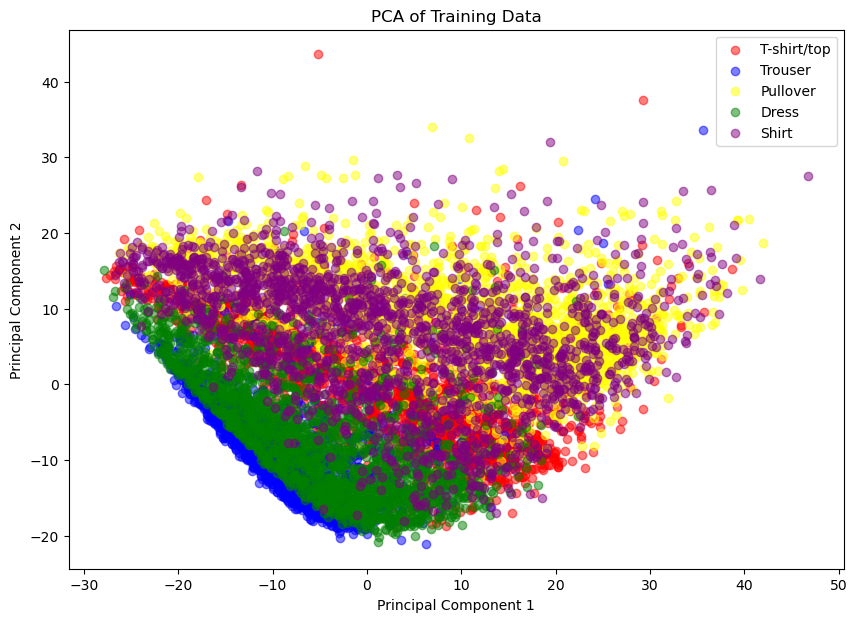

In [14]:
# Plotting the PCA results for the training data
plot_pca(train_data_pca, train_labels, 'PCA of Training Data')

Linear Discriminant Analysis (LDA) is used in to find a linear combination of features that best separates two or more classes of objects or events. It maximizes the separation between different classes by projecting the data onto a lower-dimensional space defined by the linear discriminants. This makes it particularly useful for classification tasks.

1. Standardize the Data: First, we standardize the data to have a mean of zero and a standard deviation of one. This ensures that each feature contributes equally to the analysis.

2. Compute the Mean Vectors: Next, we calculate the mean vectors for each class in the dataset. These vectors represent the average values for each feature within each class.

3. Compute the Scatter Matrices: We then compute the within-class scatter matrix and the between-class scatter matrix. The within-class scatter matrix measures the spread of data points within each class, while the between-class scatter matrix measures the spread of the mean vectors between classes.

4. Find Eigenvalues and Eigenvectors: We find the eigenvalues and eigenvectors of the matrix obtained by multiplying the inverse of the within-class scatter matrix by the between-class scatter matrix. The eigenvectors represent the directions that maximize the separation between classes, while the eigenvalues indicate the magnitude of this separation.

5. Select Linear Discriminants: The eigenvectors are sorted in descending order based on their corresponding eigenvalues. We select the top eigenvectors (linear discriminants) to form a new feature space. The number of linear discriminants chosen depends on the number of classes minus one.

6. Transform the Data: Finally, we project the original data onto the new feature space defined by the linear discriminants. This results in a transformed dataset with reduced dimensions.

LDA is useful for classification tasks, as it maximizes the separation between different classes. By reducing the number of dimensions, it helps to simplify complex datasets and improve the performance of machine learning algorithms.

In [15]:
# Initialize LDA
lda = LinearDiscriminantAnalysis(n_components=4)

In [16]:
# Fit LDA on the training data and transform both training and test data
train_data_lda = lda.fit_transform(train_data, train_labels)
test_data_lda = lda.transform(test_data)

In [17]:
print(f"Original shape: {train_data.shape}")
print(f"Transformed shape: {train_data_lda.shape}")

Original shape: (10000, 784)
Transformed shape: (10000, 4)


The Explained Variance Ratio is also used in Linear Discriminant Analysis (LDA). In LDA, it indicates how much of the total variance is captured by each linear discriminant. This helps in understanding the importance of each discriminant in separating the classes and deciding how many discriminants to keep for dimensionality reduction.

In [18]:
# Calculate the explained variance ratio
explained_variance_ratio_lda = lda.explained_variance_ratio_
print(f"Explained variance by the first four linear discriminants: {explained_variance_ratio_lda}")
# Calculate the total variance explained by the first four linear discriminants
total_explained_variance_lda = np.sum(explained_variance_ratio_lda)
print(f"Total variance explained by the first four linear discriminants: {total_explained_variance_lda * 100:.2f}%")

Explained variance by the first four linear discriminants: [0.61113178 0.20240552 0.13128745 0.05517525]
Total variance explained by the first four linear discriminants: 100.00%


In [19]:
# Define a function to plot LDA results with specified colors and labels for each category
def plot_lda(data, labels, title):
    plt.figure(figsize=(10, 7))
    colors = {0: 'red', 1: 'blue', 2: 'yellow', 3: 'green', 4: 'purple'}
    label_names = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Shirt'}
    
    for label in np.unique(labels):
        indices = labels == label
        plt.scatter(data[indices, 0], data[indices, 1], color=colors[label], label=label_names[label], alpha=0.5)
    
    plt.legend()
    plt.title(title)
    plt.xlabel('Linear Discriminant 1')
    plt.ylabel('Linear Discriminant 2')
    plt.show()

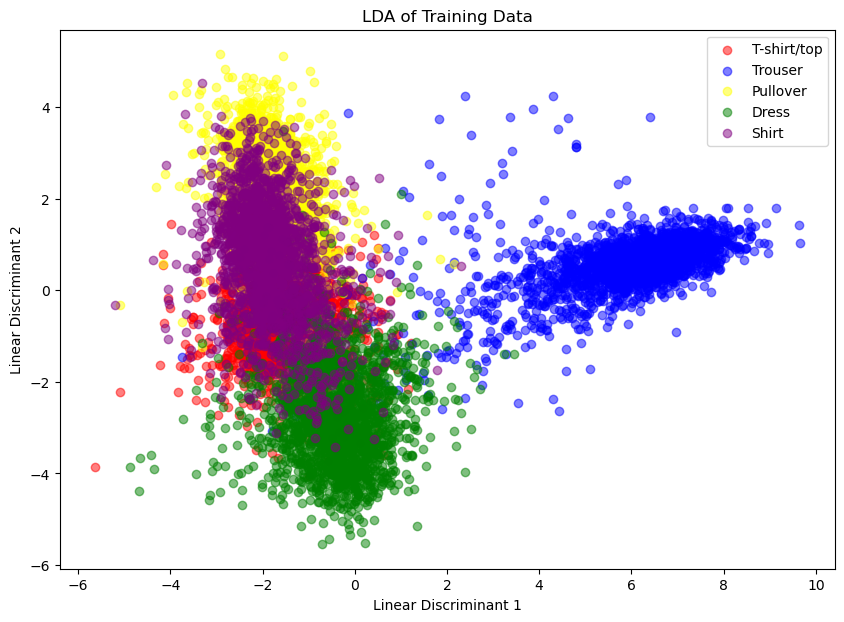

In [20]:
# Plotting the LDA results for the training data
plot_lda(train_data_lda, train_labels, 'LDA of Training Data')

Reference Decision Tree with PCA

In [21]:
# Initialize the decision tree classifier with the same max_depth
clf = DecisionTreeClassifier(max_depth=5)

In [22]:
# Fit the model on the training data no need to renormalize or make a new PCA
clf.fit(train_data_pca, train_labels)

DecisionTreeClassifier(max_depth=5)

In [23]:
# Make predictions on the test data
test_predictions = clf.predict(test_data_pca)

In [24]:
# Calculate accuracy
accuracy_pca = np.mean(test_predictions == test_labels)
print(f"Reference Decision Tree Accuracy with PCA: {accuracy_pca * 100:.2f}%")

Reference Decision Tree Accuracy with PCA: 65.58%


Reference Decision Tree with LDA

In [25]:
# Initialize the decision tree classifier with the same hyperparameters
clf_lda = DecisionTreeClassifier(max_depth=5)

In [26]:
# Fit the model on the LDA-transformed training data
clf_lda.fit(train_data_lda, train_labels)

DecisionTreeClassifier(max_depth=5)

In [27]:
# Make predictions on the LDA-transformed test data
test_predictions_lda = clf_lda.predict(test_data_lda)

In [28]:
# Calculate accuracy
accuracy_lda = clf_lda.score(test_data_lda, test_labels)
print(f"Reference Decision Tree Accuracy with LDA: {accuracy_lda * 100:.2f}%")

Reference Decision Tree Accuracy with LDA: 80.44%


In [29]:
# Generate the classification report with label names
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Shirt']
report_lda = classification_report(test_labels, test_predictions_lda, target_names=label_names)
print(report_lda)

              precision    recall  f1-score   support

 T-shirt/top       0.72      0.83      0.77      1000
     Trouser       0.98      0.95      0.96      1000
    Pullover       0.81      0.80      0.81      1000
       Dress       0.80      0.88      0.84      1000
       Shirt       0.71      0.56      0.63      1000

    accuracy                           0.80      5000
   macro avg       0.80      0.80      0.80      5000
weighted avg       0.80      0.80      0.80      5000



Functions and Classes for Manually Programmed Decision Tree

Define the Decision Tree Node Class: A class DecisionTreeNode is defined to represent each node in the decision tree. Each node has attributes for the feature, threshold, left and right child nodes, and the value if it's a leaf node.

In [30]:
class DecisionTreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

Calculate Gini Impurity: The Gini impurity is a measure of how often a randomly chosen element would be incorrectly classified. It is calculated using the formula: $$ Gini = 1 - \sum (p_i^2) $$ where 
𝑝_𝑖
 is the probability of an element belonging to class 
𝑖
.

In [31]:
def gini_impurity(labels):
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    return 1 - np.sum(probabilities ** 2)

Calculate Information Gain: Information gain measures the reduction in impurity after a dataset is split on a feature. It is calculated as: $$ Information\ Gain = Current\ Impurity - \left( \frac{n_{left}}{n_{total}} \times Gini_{left} + \frac{n_{right}}{n_{total}} \times Gini_{right} \right) $$ where 
𝑛
𝑙
𝑒
𝑓
𝑡
 and 
𝑛
𝑟
𝑖
𝑔
ℎ
𝑡
 are the number of elements in the left and right splits, respectively.

In [32]:
def information_gain(left_labels, right_labels, current_impurity):
    p = len(left_labels) / (len(left_labels) + len(right_labels))
    return current_impurity - p * gini_impurity(left_labels) - (1 - p) * gini_impurity(right_labels)

Find the Best Split: The best split is determined by iterating over all features and all possible threshold values. For each split, the information gain is calculated, and the split with the highest information gain is chosen.

In [33]:
def best_split(data, labels):
    best_gain = 0
    best_split = None
    current_impurity = gini_impurity(labels)
    n_features = data.shape[1]
    
    for feature in range(n_features):
        values = np.unique(data[:, feature])
        for val in values:
            left_indices = data[:, feature] <= val
            right_indices = data[:, feature] > val
            left_labels = labels[left_indices]
            right_labels = labels[right_indices]
            
            if len(left_labels) == 0 or len(right_labels) == 0:
                continue
            
            gain = information_gain(left_labels, right_labels, current_impurity)
            
            if gain > best_gain:
                best_gain = gain
                best_split = (feature, val)
    
    return best_split

Build the Tree: The decision tree is built recursively. Starting from the root node, the best split is found, and the data is divided into left and right subsets. This process is repeated for each subset until a stopping criterion is met (e.g., maximum depth or pure nodes).

In [34]:
def build_tree(data, labels, depth=0, max_depth=None):
    if len(np.unique(labels)) == 1:
        return DecisionTreeNode(value=labels[0])
    
    if max_depth is not None and depth >= max_depth:
        return DecisionTreeNode(value=np.bincount(labels).argmax())
    
    feature, threshold = best_split(data, labels)
    
    if feature is None:
        return DecisionTreeNode(value=np.bincount(labels).argmax())
    
    left_indices = data[:, feature] <= threshold
    right_indices = data[:, feature] > threshold
    
    left_node = build_tree(data[left_indices], labels[left_indices], depth + 1, max_depth)
    right_node = build_tree(data[right_indices], labels[right_indices], depth + 1, max_depth)
    
    return DecisionTreeNode(feature, threshold, left_node, right_node)

Predict with the Tree: To make predictions, the data points are passed through the tree. At each node, the feature value is compared to the threshold, and the data point is directed to the left or right child node accordingly. This process continues until a leaf node is reached, and the value of the leaf node is the predicted class.

In [35]:
def predict(tree, data_point):
    if tree.value is not None:
        return tree.value
    
    if data_point[tree.feature] <= tree.threshold:
        return predict(tree.left, data_point)
    else:
        return predict(tree.right, data_point)

In [36]:
def predict_batch(tree, data):
    predictions = [predict(tree, data_point) for data_point in data]
    return np.array(predictions)

Manual Decision Tree with PCA

In [37]:
# Initiate manual decision tree with the same hyperparameters using PCA training data
decision_tree = build_tree(train_data_pca, train_labels, max_depth=5)

In [38]:
# Create Predictions with PCA data
predictions = predict_batch(decision_tree, train_data_pca)
print(f"Predictions: {predictions}")

Predictions: [0 4 0 ... 3 0 3]


In [39]:
# Make predictions on the PCA test data
test_predictions = predict_batch(decision_tree, test_data_pca)


In [40]:
# Calculate accuracy
accuracy_pca = np.mean(test_predictions == test_labels)
print(f"Accuracy with PCA: {accuracy_pca * 100:.2f}%")

Accuracy with PCA: 65.58%


In [41]:
# Generate the classification report with label names
report = classification_report(test_labels, test_predictions, target_names=label_names)
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.74      0.73      0.74      1000
     Trouser       0.92      0.68      0.78      1000
    Pullover       0.61      0.83      0.70      1000
       Dress       0.61      0.82      0.70      1000
       Shirt       0.39      0.21      0.28      1000

    accuracy                           0.66      5000
   macro avg       0.65      0.66      0.64      5000
weighted avg       0.65      0.66      0.64      5000



Manual Decision Tree with LDA

In [42]:
# Initiate manual decision tree with the same hyperparameters using LDA training data
decision_tree_lda = build_tree(train_data_lda, train_labels, max_depth=5)

In [43]:
# Make predictions on the LDA test data
test_predictions_lda = predict_batch(decision_tree_lda, test_data_lda)

In [44]:
# Calculate accuracy
accuracy_lda = np.mean(test_predictions_lda == test_labels)
print(f"Manual Decision Tree Accuracy with LDA: {accuracy_lda * 100:.2f}%")

Manual Decision Tree Accuracy with LDA: 80.44%


In [45]:
# Generate the classification report with label names
report_lda = classification_report(test_labels, test_predictions_lda, target_names=label_names)
print(report_lda)

              precision    recall  f1-score   support

 T-shirt/top       0.72      0.83      0.77      1000
     Trouser       0.98      0.95      0.96      1000
    Pullover       0.81      0.80      0.81      1000
       Dress       0.80      0.88      0.84      1000
       Shirt       0.71      0.56      0.63      1000

    accuracy                           0.80      5000
   macro avg       0.80      0.80      0.80      5000
weighted avg       0.80      0.80      0.80      5000

